In [17]:
%matplotlib inline

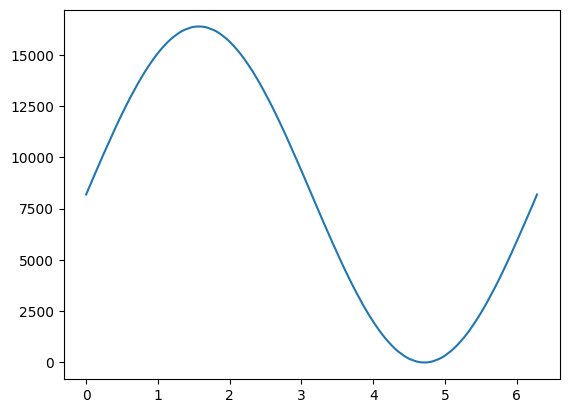

In [18]:
from matplotlib.pyplot import plot
import math
import decimal
import numpy as np

depth = 8192
width = 14

x = np.linspace(0, 2 * math.pi, num=depth - 1)
y = np.sin(x)
# 上移
y = y + 1
# 归一化
y = y / 2
y = y * (pow(2, width) - 1)
y = y / pow(2, width)
# 整数化
y_round = np.round(y * pow(2, width))
plot(x, y_round)

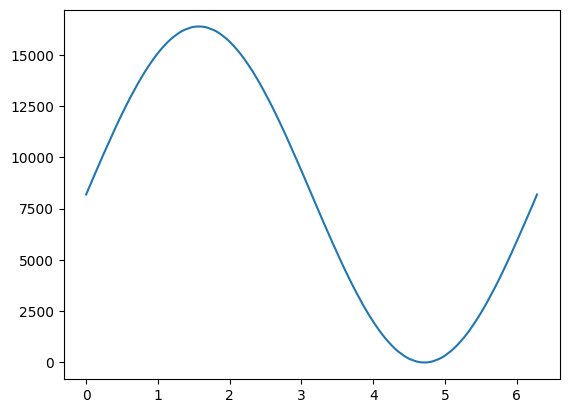

In [1]:
from matplotlib.pyplot import plot
import math
import numpy as np

depth = 8192
width = 14

x = np.linspace(0, 2 * math.pi, num=depth - 1)
y = np.sin(x)
# 上移并归一化
y = (y + 1) / 2
# 转为整数表示
y_round = np.round(y * (pow(2, width) - 1))

plot(x, y_round)

```matlab
fs   = 100e6; 
f_lo = 10e6; 
f_in = 2e6; 
B    = 6e6; % 带宽 
NFFT = 2000; 
MFFT = 512; 
t = 0:1/fs:1/fs*(NFFT-1); 
Kr = B / ( 1/fs*NFFT ); 
phi1 = pi/2; 
snr = 15; 
freq_axix = 0:fs/NFFT:fs-fs/NFFT; %% 双边带混频 实数混频 % fin 点频 +  LO 点频  
s_in = awgn(cos(2*pi*f_in*t ), snr); 
s_lo = awgn(cos(2*pi*f_lo*t ), snr);  
s_mixer1 = s_in .* s_lo; 
s_in_fft = fft(s_in); 
s_lo_fft = fft(s_lo); 
s_mixer1_fft = fft(s_mixer1); 
figure; 
subplot(3,1,1);
plot(freq_axix(1:end/2)/1e6,db(s_in_fft(1:end/2)));
title('subplot 1 : s_in','Interpreter','none');
xlabel('MHz');
ylabel('dB');
subplot(3,1,2);
plot(freq_axix(1:end/2)/1e6,db(s_lo_fft(1:end/2)));
title('subplot 2 : s_lo','Interpreter','none');
xlabel('MHz');ylabel('dB');
subplot(3,1,3);
plot(freq_axix(1:end/2)/1e6,db(s_mixer1_fft(1:end/2)));
title('subplot 3 : mix','Interpreter','none');
xlabel('MHz');
ylabel('dB');
figure; stft(s_mixer1,fs);
title('混频后的 时-频相应'); % fin 扫频 +  LO 点频  
s_bw = awgn( cos(2*pi*f_in*t + pi*Kr*t.^2) , snr); 
s_mixer2 = s_bw .* s_lo;  
f_in_fft = fft(f_in); 
s_bw_fft = fft(s_bw); s_lo_fft = fft(s_lo); 
s_mixer2_fft = fft(s_mixer2);  
figure; subplot(3,1,1);
plot(freq_axix(1:end/2)/1e6,db(s_bw_fft(1:end/2)));
title('信号 频谱');
xlabel('MHz');
ylabel('dB'); 
subplot(3,1,2);
plot(freq_axix(1:end/2)/1e6,db(s_lo_fft(1:end/2)));
title('本振 频谱');
xlabel('MHz');
ylabel('dB'); 
subplot(3,1,3);
plot(freq_axix(1:end/2)/1e6,db(s_mixer2_fft(1:end/2)));
title('混频之后的频谱');
xlabel('MHz');
ylabel('dB'); 
figure; 
subplot(1,2,1);
stft(s_bw,fs);
title('混频前的 时-频相应'); 
subplot(1,2,2);
stft(s_mixer2,fs);
title('混频后的 时-频相应');
```

Text(0.5, 1.0, '混频后的 时-频响应')

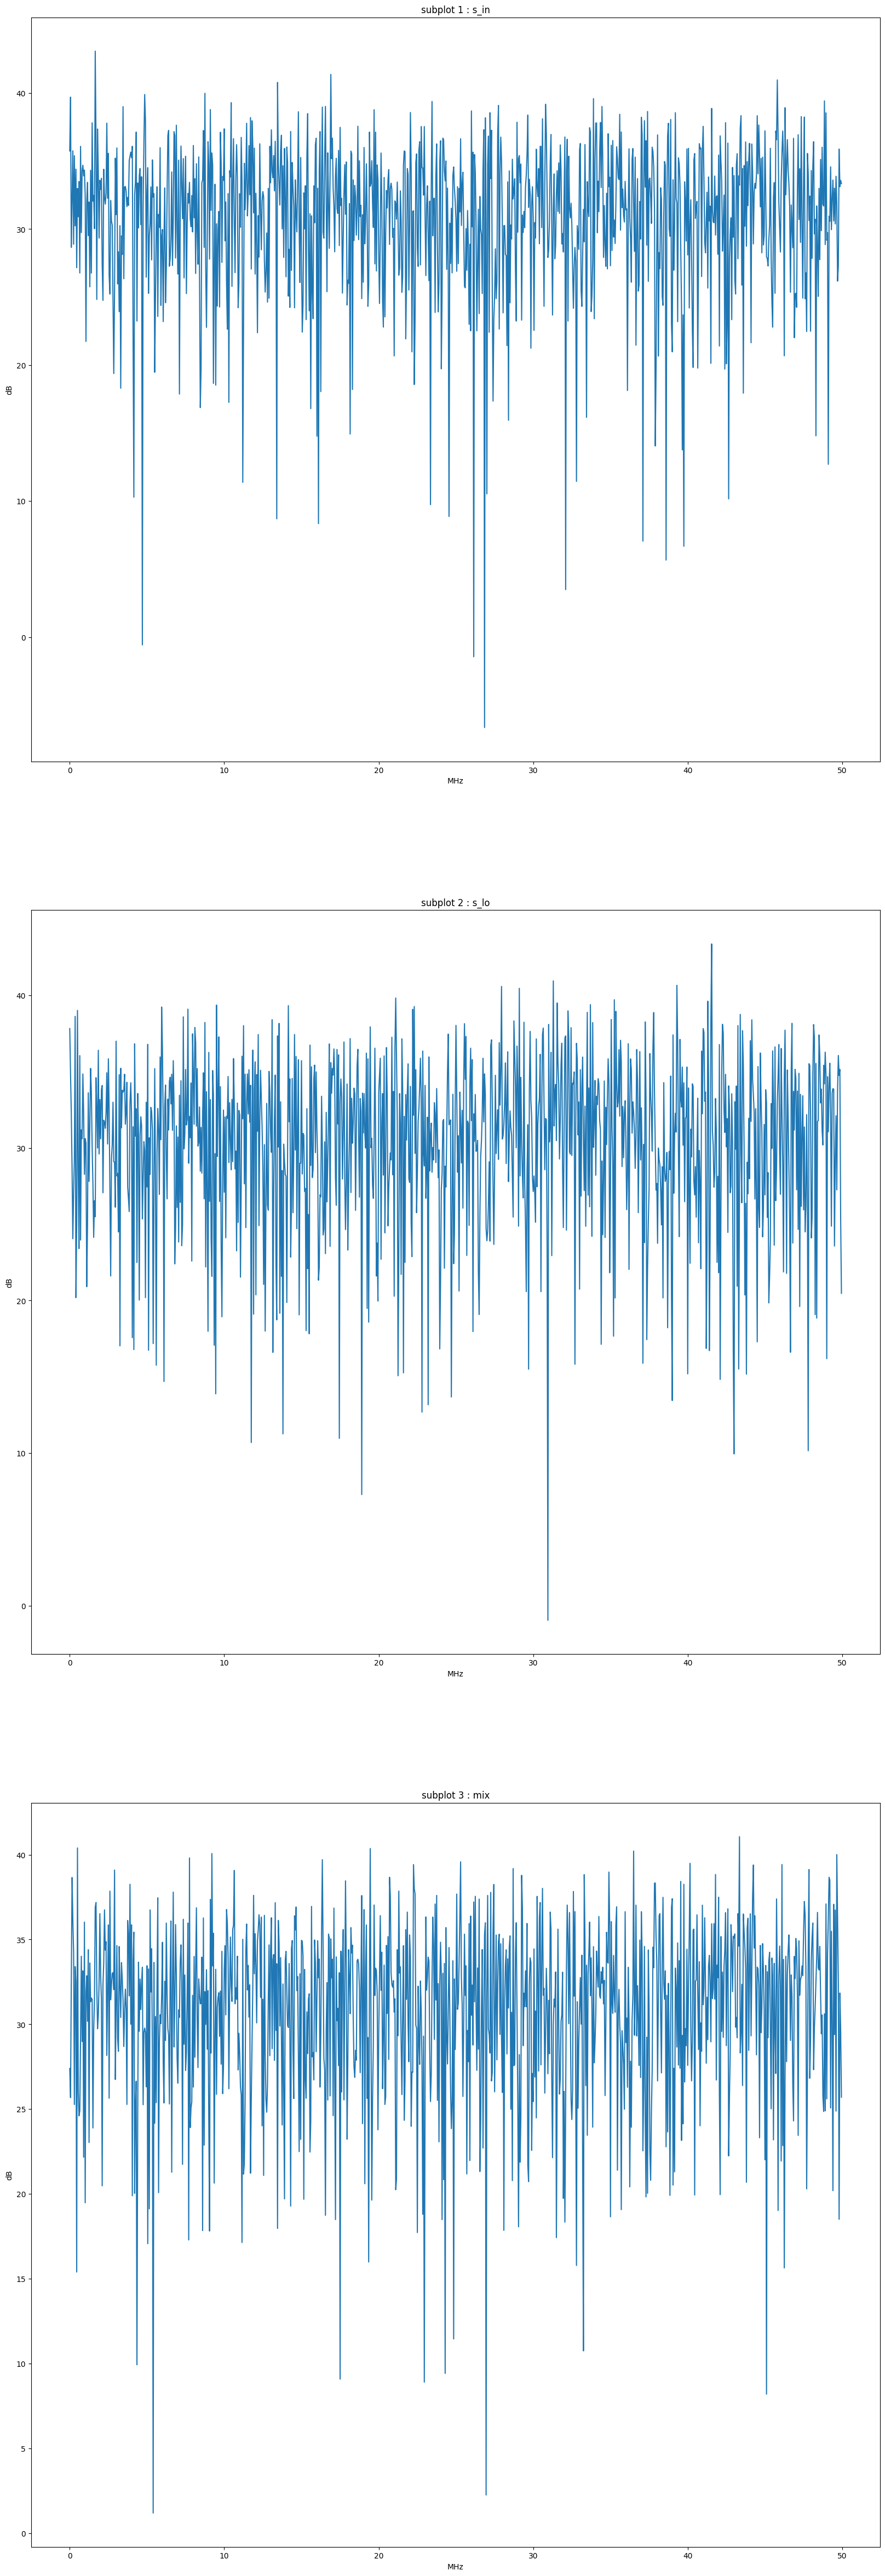

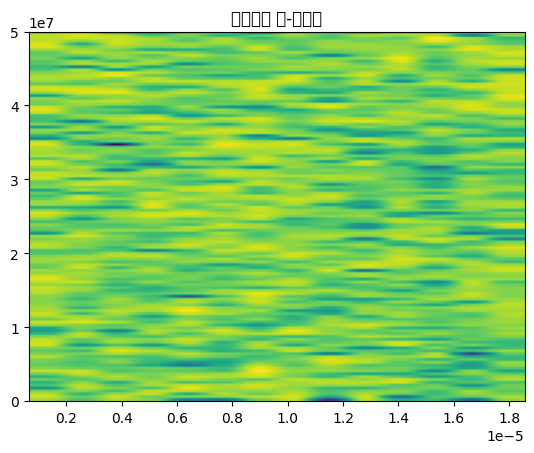

In [28]:
#-*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.io.wavfile import write

fs = 100e6
f_lo = 10e6
f_in = 2e6
B = 6e6  # 带宽
NFFT = 2000
MFFT = 512
t = np.arange(0, NFFT/fs, 1/fs)
Kr = B / (1/fs*NFFT)
phi1 = np.pi/2
snr = 15
freq_axis = np.arange(0, fs, fs/NFFT)  # 双边带混频 实数混频
s_in = np.random.normal(0, 1, len(t))  # 生成高斯白噪声
s_lo = np.random.normal(0, 1, len(t))  # 生成高斯白噪声
s_mixer1 = s_in * s_lo
s_in_fft = fft(s_in)
s_lo_fft = fft(s_lo)
s_mixer1_fft = fft(s_mixer1)
plt.figure(figsize=(20,60))
# plt.subplots_adjust(wspace = 0, hspace =0.5)#调整子图间距
plt.subplot(3,1,1)
plt.plot(freq_axis[:NFFT//2]/1e6, 20 * np.log10(np.abs(s_in_fft[:NFFT//2])))
plt.title('subplot 1 : s_in')
plt.xlabel('MHz')
plt.ylabel('dB')
plt.subplot(3,1,2)
plt.plot(freq_axis[:NFFT//2]/1e6, 20 * np.log10(np.abs(s_lo_fft[:NFFT//2])))
plt.title('subplot 2 : s_lo')
plt.xlabel('MHz')
plt.ylabel('dB')
plt.subplot(3,1,3)
plt.plot(freq_axis[:NFFT//2]/1e6, 20 * np.log10(np.abs(s_mixer1_fft[:NFFT//2])))
plt.title('subplot 3 : mix')
plt.xlabel('MHz')
plt.ylabel('dB')
plt.figure()
plt.specgram(s_mixer1, Fs=fs)
plt.title('混频后的 时-频响应')
# s_bw = np.random.normal(0, 1, len(t))
# s_mixer2 = s_bw * s_lo
# f_in_fft = fft(f_in)
# s_bw_fft = fft(s_bw)
# s_lo_fft = fft(s_lo)
# s_mixer2_fft = fft(s_mixer2)
# plt.figure()
# plt.subplot(3,1,1)
# plt.plot(freq_axis[:NFFT//2]/1e6, 20 * np.log10(np.abs(s_bw_fft[:NFFT//2])))
# plt.title('信号 频谱')
# plt.xlabel('MHz')
# plt.ylabel('dB')
# plt.subplot(3,1,2)
# plt.plot(freq_axis[:NFFT//2]/1e6, 20 * np.log10(np.abs(s_lo_fft[:NFFT//2])))
# plt.title('本振 频谱')
# plt.xlabel('MHz')
# plt.ylabel('dB')
# plt.subplot(3,1,3)
# plt.plot(freq_axis[:NFFT//2]/1e6, 20 * np.log10(np.abs(s_mixer2_fft[:NFFT//2])))
# plt.title('混频之后的频谱')
# plt.xlabel('MHz')
# plt.ylabel('dB')
# plt.figure()
# plt.subplot(1,2,1)
# plt.specgram(s_bw, Fs=fs)
# plt.title('混频前的 时-频响应')
# plt.subplot(1,2,2)
# plt.specgram(s_mixer2, Fs=fs)
# plt.title('混频后的 时-频响应')
# plt.show()


In [29]:
a = fft(15)
print(a)

IndexError: tuple index out of range